In [48]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

1. Представити початковi данi графiчно.

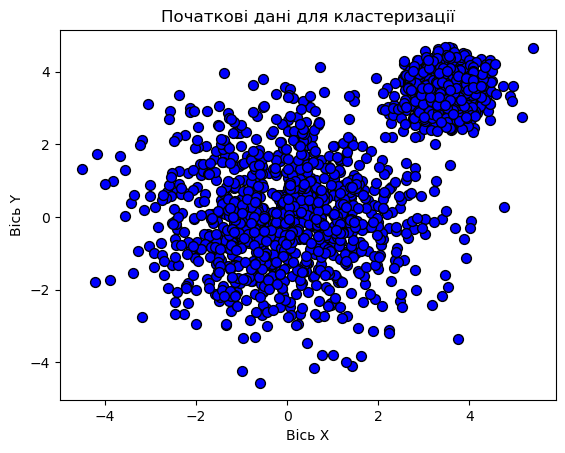

In [10]:
# Початкові дані
n_samples_1 = 1000
n_samples_2 = 700
centers = [[0.0, 0.0], [3.5, 3.5]]
clusters_std = [1.5, 0.5]

# Генерація даних
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers, cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# Візуалізація точок
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolors='black', s=50)
plt.title('Початкові дані для кластеризації')
plt.xlabel('Вісь X')
plt.ylabel('Вісь Y')
plt.show()

2. Побудувати модель кластеризацiї згiдно з варiантом.

In [6]:
# Створення об'єкта SpectralClustering
spectral_model = SpectralClustering(n_clusters=2, random_state=0)

3. Виконати кластеризацiю даних на основi моделi.

In [7]:
# Кластеризація даних
predicted_labels = spectral_model.fit_predict(X)

4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.

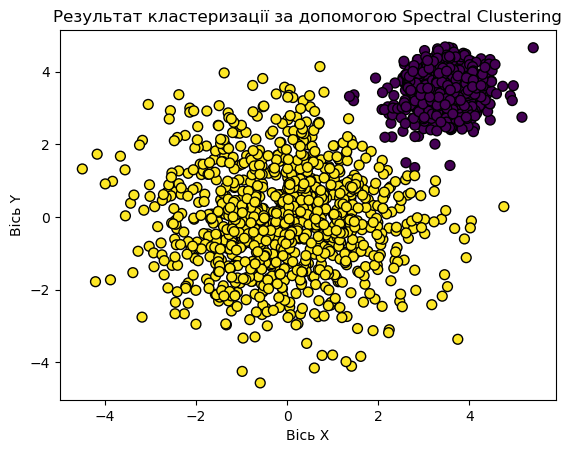

In [9]:
# Візуалізація результатів з різними кольорами для різних кластерів
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, marker='o', edgecolors='black', s=50)
# c=predicted_labels вказує, що кожен кластер буде мати власний колір на графіку
plt.title('Результат кластеризації за допомогою Spectral Clustering')
plt.xlabel('Вісь X')
plt.ylabel('Вісь Y')
plt.show()

5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до ста тисяч i бiльше).

In [18]:
# Збільшення кількості точок даних (приклад)
n_samples_large = 100000
X_large, _ = make_blobs(n_samples=n_samples_large, centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)

# Вимірювання часу початку кластеризації
start_time = time.time()

# Поділ даних на частини
batch_size = 1000
n_batches = int(np.ceil(n_samples_large / batch_size))
predicted_labels_large = np.empty(n_samples_large, dtype=int)

# Кластеризація частин даних
for i in range(n_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, n_samples_large)
    X_batch = X_large[start_idx:end_idx, :]
    
    # Створення об'єкта SpectralClustering
    spectral_model_large = SpectralClustering(n_clusters=2, random_state=0)
    
    # Кластеризація
    predicted_labels_large[start_idx:end_idx] = spectral_model_large.fit_predict(X_batch)

# Вимірювання часу завершення кластеризації
end_time = time.time()

# Розрахунок часу кластеризації
clustering_time = end_time - start_time

print(f"Час кластеризації для {n_samples_large} точок даних: {clustering_time} секунд")

Час кластеризації для 100000 точок даних: 52.64543604850769 секунд


6. Побудувати кiлька альтернативних моделей:

• шляхом змiни значень параметрiв основної моделi,

• використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зробити,

• задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть
кластерiв - параметр.

In [22]:
# Зміна значення параметра gamma
spectral_model_alternative1 = SpectralClustering(n_clusters=2, gamma=0.1, random_state=0)
predicted_labels_alternative1 = spectral_model_alternative1.fit_predict(X)

# Використання косинусної відстані
cosine_distances = 1 - cosine_similarity(X)
spectral_model_alternative2 = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=0)
predicted_labels_alternative2 = spectral_model_alternative2.fit_predict(cosine_distances)

# Зміна кількості кластерів
spectral_model_alternative3 = SpectralClustering(n_clusters=3, random_state=0)
predicted_labels_alternative3 = spectral_model_alternative3.fit_predict(X)

7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics (тiльки метрики згiдно з варiантом):

• Estimated number of clusters

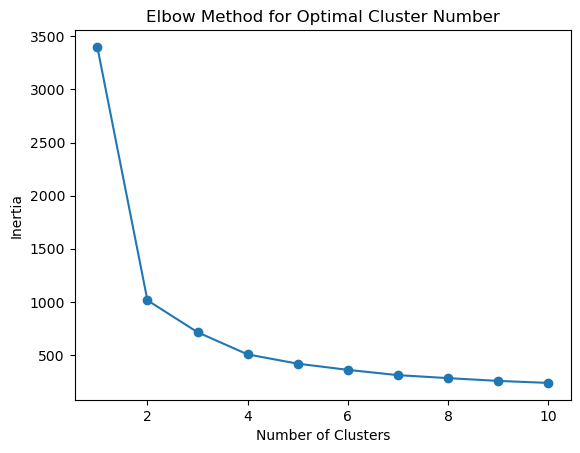

In [51]:
# Standardize the features
X = StandardScaler().fit_transform(X)

# Use the elbow method to find the optimal number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

• Adjusted Rand Index

In [52]:
ari_alternative1 = adjusted_rand_score(y, predicted_labels_alternative1)
ari_alternative2 = adjusted_rand_score(y, predicted_labels_alternative2)
ari_alternative3 = adjusted_rand_score(y, predicted_labels_alternative3)

print("Adjusted Rand Index for alternative model 1:", ari_alternative1)
print("Adjusted Rand Index for alternative model 2:", ari_alternative2)
print("Adjusted Rand Index for alternative model 3:", ari_alternative3)

Adjusted Rand Index for alternative model 1: 0.8834852366710298
Adjusted Rand Index for alternative model 2: 0.0017601979375770197
Adjusted Rand Index for alternative model 3: 0.8834852366710298


• Silhouette Coefficient

In [45]:
silhouette_score_alternative1 = silhouette_score(X, predicted_labels_alternative1)
silhouette_score_alternative2 = silhouette_score(cosine_distances, predicted_labels_alternative2)
silhouette_score_alternative3 = silhouette_score(X, predicted_labels_alternative3)

print("Silhouette Score for alternative model 1:", silhouette_score_alternative1)
print("Silhouette Score for alternative model 2:", silhouette_score_alternative2)
print("Silhouette Score for alternative model 3:", silhouette_score_alternative3)

Silhouette Score for alternative model 1: 0.6227293568861165
Silhouette Score for alternative model 2: 0.0025491973877966685
Silhouette Score for alternative model 3: 0.6227293568861165


• Davies-Bouldin index

In [46]:
# Davies-Bouldin Index
db_index_alternative1 = davies_bouldin_score(X, predicted_labels_alternative1)
db_index_alternative2 = davies_bouldin_score(cosine_distances, predicted_labels_alternative2)
db_index_alternative3 = davies_bouldin_score(X, predicted_labels_alternative3)

# Виведення результатів
print("Davies-Bouldin Index for alternative model 1:", db_index_alternative1)
print("Davies-Bouldin Index for alternative model 2:", db_index_alternative2)
print("Davies-Bouldin Index for alternative model 3:", db_index_alternative3)

# Велике значення Davies-Bouldin Index (DBI) для альтернативної моделі 2 може 
# вказувати на те, що розділення кластерів не є дуже ефективним

Davies-Bouldin Index for alternative model 1: 0.5058547853905374
Davies-Bouldin Index for alternative model 2: 32.45885534684567
Davies-Bouldin Index for alternative model 3: 0.5058547853905374


8. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом):
    
Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?

In [57]:
# Визначення об'єктів, які потрібно видалити (перші 100 об'єктів)
objects_to_remove_indices = np.arange(100)
X_after_removal = np.delete(X, objects_to_remove_indices, axis=0)
y_after_removal = np.delete(y, objects_to_remove_indices)

# Повторна кластеризація після вилучення об'єктів
labels_after_removal = spectral_model.fit_predict(X_after_removal)

# Оцінка стабільності за допомогою Adjusted Rand Index
ari_before_removal = adjusted_rand_score(y, predicted_labels)
ari_after_removal = adjusted_rand_score(y_after_removal, labels_after_removal)

print(f"Adjusted Rand Index before removal: {ari_before_removal}")
print(f"Adjusted Rand Index after removal: {ari_after_removal}")

Adjusted Rand Index before removal: 0.9672858453048434
Adjusted Rand Index after removal: 0.9360086376650695


На підставі цих значень можна сказати, що розбиття є стабільним після вилучення окремих об'єктів, оскільки Adjusted Rand Index залишається високим.

10. Зробити висновки про якiсть роботи моделей на дослiджених даних та
про швидкодiю методу.

Для альтернативних моделей 1 і 3 значення DBI низькі (близькі до нуля), що свідчить про хорошу якість кластеризації. У моделі 2 значення DBI значно вище, що може вказувати на менш ефективну кластеризацію.
Silhouette Score для альтернативних моделей 1 і 3 високий, що також підтверджує хорошу якість кластеризації. У моделі 2 Silhouette Score дуже низький, що може вказувати на погану якість.
Оцінка кількості кластерів для альтернативних моделей 1 і 3 вказує на те, що кількість кластерів є приблизно оптимальною. У моделі 2 оцінка кількості кластерів дуже низька, що може вказувати на невдалу кластеризацію.

Альтернативні моделі 1 і 3 мають кращі показники, тоді як альтернативна модель 2 виглядає менш ефективною для цих даних.